# Implement a k-means clustering algorithm

In [48]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt
import numpy as np

In [49]:
X, Y = make_blobs(n_samples=500, cluster_std=0.8, centers=3, n_features=3, random_state=0)
print(X.shape, Y.shape)
print(X, Y)

(500, 3) (500,)
[[ 0.02913978 -2.54171761  2.29810053]
 [-1.85231334  8.58471243  9.80638983]
 [ 0.96381813 -0.70884929  1.73464089]
 ...
 [-1.45306004  8.26962677  9.54176377]
 [-0.01124477 -3.19260781  1.5956487 ]
 [ 1.02972821 -1.04955379  3.52650834]] [1 2 1 2 1 2 0 1 1 1 1 2 2 1 2 0 1 1 2 0 0 0 2 1 0 1 0 0 2 0 2 1 1 1 2 2 2
 0 0 0 0 2 2 2 2 0 0 0 2 1 0 1 2 2 0 2 1 1 1 0 0 0 2 2 2 2 1 0 2 1 2 0 0 0
 2 0 2 2 0 1 1 2 1 2 2 2 0 2 1 1 2 2 2 0 1 1 0 0 2 0 1 1 2 0 2 0 1 0 1 0 0
 2 0 1 1 2 0 2 0 1 1 1 2 0 0 1 2 2 1 0 1 2 1 0 2 2 2 0 1 1 1 1 0 0 2 0 0 1
 2 0 2 1 2 2 0 2 1 0 2 2 2 2 0 2 0 1 1 0 1 1 2 1 2 1 2 1 1 0 0 0 1 2 1 1 2
 1 0 0 1 0 0 2 0 2 0 2 0 0 0 1 0 2 1 1 1 2 0 2 1 0 1 2 2 1 1 2 2 2 1 0 0 0
 0 0 1 1 1 0 0 1 0 1 1 1 2 1 2 0 2 0 0 0 1 1 2 2 0 1 0 1 2 0 1 0 2 1 2 1 0
 2 1 1 2 0 1 1 2 1 2 2 0 1 2 2 0 1 0 0 0 1 2 2 0 0 1 1 0 1 0 2 1 2 2 1 1 2
 0 2 2 1 1 0 1 0 2 0 1 2 1 0 1 0 2 0 2 0 1 0 2 2 2 1 0 0 0 2 1 2 2 1 0 1 1
 1 1 2 1 1 0 0 1 0 0 0 2 2 1 1 0 1 2 1 0 0 0 2 2 1 2 0 2 2 1 0 0 0 2 

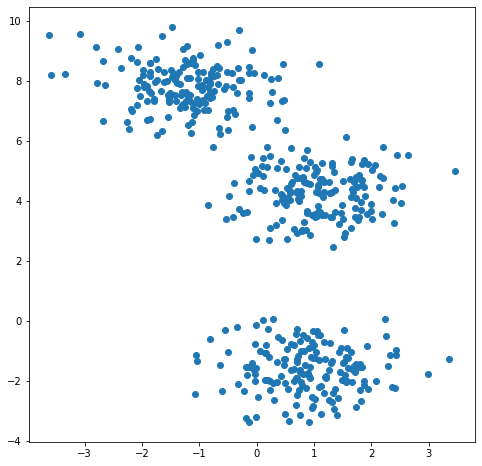

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:, 1])

In [51]:
def find_clusters(x, k_clusters):
    """A function that take data points with two features and k number of cluster and returns partitioned data."""
    # randomly choose clusters
    rng = np.random.RandomState(2)
    i = rng.permutation(X.shape[0])[:k_clusters]
    centers = X[i]
    
    while True:
        # assign labels based on closet center
        labels = pairwise_distances_argmin(X, centers)
        
        # find new centers from mean of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(k_clusters)])
        
        # check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return(centers, labels)

### Plot the clusters

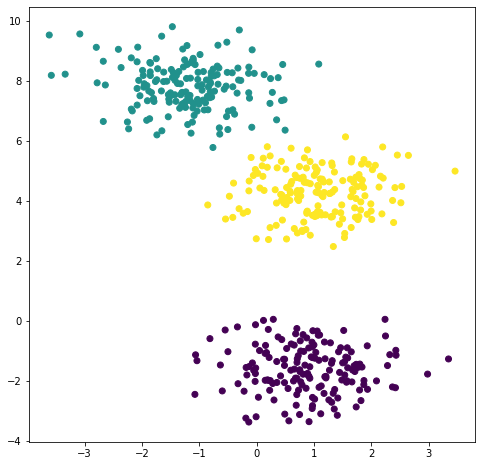

In [52]:
centers, labels = find_clusters(X, 3)
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=labels)